In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Advertising.csv")
df.drop('Unnamed: 0', axis =1, inplace = True)

In [3]:
X = df.drop('sales', axis= 1, index = None)
y = df['sales']

In [4]:
# the model_selection family has train_test_split model
from sklearn.model_selection import train_test_split

In [5]:
# is it important to know the order at which the train_test_split() returns values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 101)

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [7]:
model.coef_


array([ 0.04469599,  0.1875657 , -0.00032275])

- here the 'newspaper' actually have negative coefficient
- meaning that for each unit spent will decrease the 'sales' by 0.00032
- since it is almost zero and will decrease 'sales' anyway it is not worthy considering

In [8]:
model.intercept_

np.float64(3.1515267680706547)

In [9]:
y_hat_test = model.predict(X_test)
y_hat_train = model.predict(X_train)

In [10]:
model.score(X_train, y_train)

0.8856665510409361

In [11]:
model.score(X_test, y_test)

0.9185780903322445

In [12]:
test_residuals = y_test - y_hat_test
train_residuals = y_train - y_hat_train

In [13]:
test_MSE = (test_residuals**2).mean()

In [14]:
train_MSE = (train_residuals**2).mean()

In [15]:
test_MSE , train_MSE
# here the test_MSE is smaller than train_MSE. hence we can say that the model is not overfitted

(np.float64(2.2987166978863796), np.float64(3.0088167761579947))

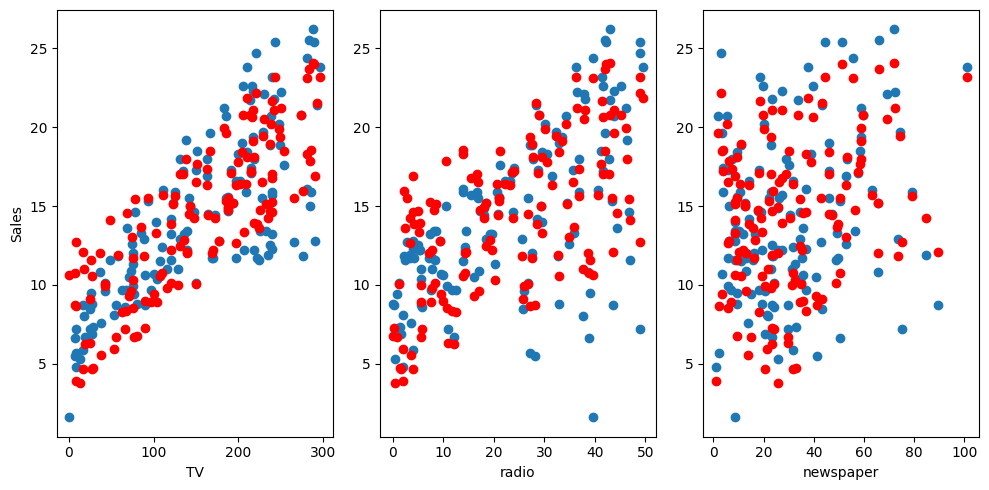

In [16]:
# train data plot
fig, ax = plt.subplots(1,3, figsize = (10,5))
for index, feature in enumerate(X):
    ax[index].scatter(X_train[feature], y_train ) 
    ax[index].scatter(X_train[feature], y_hat_train, c='red')
    ax[index].set_xlabel(feature)
    ax[0].set_ylabel('Sales')
fig.tight_layout()
    

In [17]:
# when we actually know the formula we don't actually need these metrices from the library
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
df['sales'].mean()

np.float64(14.0225)

In [19]:
mean_absolute_error(y_test, y_hat_test)

np.float64(1.213745773614481)

In [20]:
# here the unit is sales^2
mean_squared_error(y_test, y_hat_test) == test_MSE

np.True_

In [21]:
# RMSE
# here the unit is as as of sales
np.sqrt(mean_squared_error(y_test, y_hat_test))
# or
np.sqrt(test_MSE)

np.float64(1.5161519375993884)

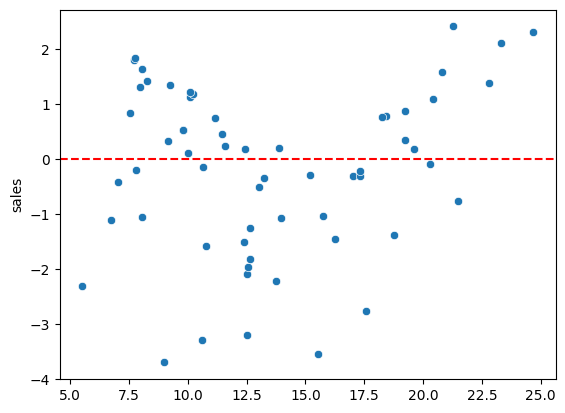

In [22]:
# this is residual plot, the dots in residual plot should not form any pattern
# if it follows any patterns(has heteroscedasticity meaning has no constant variance)
# we can conclude that the model we used is not appropriate for the dataset.
sns.scatterplot(x= y_hat_test, y=test_residuals)
plt.axhline(y=0,ls='--', c='red')

# Deploy a Model

In [23]:
from joblib import dump, load

In [24]:
dump(model, 'advertising_sales_model.joblib')

['advertising_sales_model.joblib']

In [25]:
imported_trained_model = load('advertising_sales_model.joblib')

In [26]:
imported_trained_model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

- lets say someone asks me to predict as:
- what sales will I make if I spend 100 units in TV, 200 units in radio and 50 units in newspaper?

In [27]:
campaign = [[100,200,50]]
imported_trained_model.predict(campaign)

/home/sid/sid/machineLearning/mlenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45.11812881])

- with the RMSE of 1.516 I can conclude that 
- with the spend of units as tv->100, radio->200 and newspaper -> 50
- I can make $45 \pm 1.516 \sim 44\ to\ 46 $ sales